In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load final data
df = pd.read_csv('D:/Master_Folder/Data Science Course/Projects/StockTrendPredictor/data/processed/tesla_final.csv', index_col='Date')
df.index = pd.to_datetime(df.index, utc=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_14,EMA_14,RSI_14,...,Close_lag_7,Target_day_1_price,Target_day_2_price,Target_day_3_price,Target_day_4_price,Target_day_5_price,Target_day_6_price,Target_day_7_price,Avg_price_next_7_days,Target_trend_7day_combined
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-08 04:00:00+00:00,247.710007,259.440002,244.570007,252.940002,157219600,0.0,0.0,206.460715,214.708798,87.727089,...,196.369995,262.329987,263.260010,241.029999,248.229996,252.639999,256.559998,248.500000,253.221427,HOLD
2024-07-09 04:00:00+00:00,251.000000,265.609985,250.300003,262.329987,160210900,0.0,0.0,211.810000,221.058289,89.195639,...,197.419998,263.260010,241.029999,248.229996,252.639999,256.559998,248.500000,249.229996,251.350000,SELL
2024-07-10 04:00:00+00:00,262.799988,267.589996,257.859985,263.260010,128519400,0.0,0.0,217.410000,226.685186,89.331798,...,197.880005,241.029999,248.229996,252.639999,256.559998,248.500000,249.229996,239.199997,247.912855,SELL
2024-07-11 04:00:00+00:00,263.299988,271.000000,239.649994,241.029999,221707300,0.0,0.0,221.657143,228.597827,67.450895,...,209.860001,248.229996,252.639999,256.559998,248.500000,249.229996,239.199997,251.509995,249.409997,BUY
2024-07-12 04:00:00+00:00,235.800003,251.839996,233.089996,248.229996,155955800,0.0,0.0,226.315714,231.215450,70.012851,...,231.259995,252.639999,256.559998,248.500000,249.229996,239.199997,251.509995,246.380005,249.145713,HOLD


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_14,EMA_14,RSI_14,...,Close_lag_6,Close_lag_7,Target_day_1_price,Target_day_2_price,Target_day_3_price,Target_day_4_price,Target_day_5_price,Target_day_6_price,Target_day_7_price,Avg_price_next_7_days
count,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.0,210.0,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,290.927286,298.156572,282.987191,290.681333,9.831755e+07,0.0,0.0,288.696558,288.712625,52.397427,...,289.027095,288.571572,290.833143,291.004238,291.266715,291.709762,292.183334,292.612762,293.057619,291.809653
std,73.895774,75.434754,71.456775,73.447232,3.833127e+07,0.0,0.0,71.873998,70.262462,13.509592,...,74.403605,74.677460,73.401783,73.376897,73.375764,73.351867,73.390833,73.422175,73.485673,71.962599
min,185.220001,199.259995,182.000000,191.759995,3.716760e+07,0.0,0.0,206.460715,208.845663,20.594186,...,191.759995,191.759995,191.759995,191.759995,191.759995,191.759995,191.759995,191.759995,191.759995,199.325714
25%,231.122505,238.852501,226.377506,232.077507,6.949838e+07,0.0,0.0,234.836608,233.803323,43.566180,...,230.199997,229.899998,232.077507,232.077507,232.077507,232.077507,232.077507,232.077507,232.077507,237.797859
50%,258.699997,265.604996,252.004997,261.055008,8.812160e+07,0.0,0.0,254.943214,257.822981,51.217221,...,257.784988,257.284988,261.979996,262.070007,262.070007,262.590012,263.060013,263.500000,265.414993,258.714999
75%,350.424988,358.505013,338.075012,350.547508,1.156690e+08,0.0,0.0,347.785357,347.054018,62.660978,...,350.547508,350.547508,350.547508,350.547508,350.547508,350.547508,350.547508,350.547508,350.547508,348.138573
max,475.899994,488.540009,457.510010,479.859985,2.217073e+08,0.0,0.0,437.090001,427.639216,89.331798,...,479.859985,479.859985,479.859985,479.859985,479.859985,479.859985,479.859985,479.859985,479.859985,447.588571


In [5]:
df.dtypes

Open                          float64
High                          float64
Low                           float64
Close                         float64
Volume                          int64
Dividends                     float64
Stock Splits                  float64
SMA_14                        float64
EMA_14                        float64
RSI_14                        float64
MACD                          float64
Close_lag_1                   float64
Close_lag_2                   float64
Close_lag_3                   float64
Close_lag_4                   float64
Close_lag_5                   float64
Close_lag_6                   float64
Close_lag_7                   float64
Target_day_1_price            float64
Target_day_2_price            float64
Target_day_3_price            float64
Target_day_4_price            float64
Target_day_5_price            float64
Target_day_6_price            float64
Target_day_7_price            float64
Avg_price_next_7_days         float64
Target_trend

In [6]:
plot_df = df.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'Avg_price_next_7_days'], axis=1)
plot_df.sample()

,Close,SMA_14,EMA_14,RSI_14,MACD,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6,Close_lag_7,Target_day_1_price,Target_day_2_price,Target_day_3_price,Target_day_4_price,Target_day_5_price,Target_day_6_price,Target_day_7_price,Target_trend_7day_combined
Date,,,,,,,,,,,,,,,,,,,,
2024-10-18 04:00:00+00:00,220.699997,234.455716,230.316088,40.881401,-3.932824,220.889999,221.330002,219.570007,219.160004,217.800003,238.770004,241.050003,218.850006,217.970001,213.649994,260.480011,269.190002,262.51001,259.519989,BUY


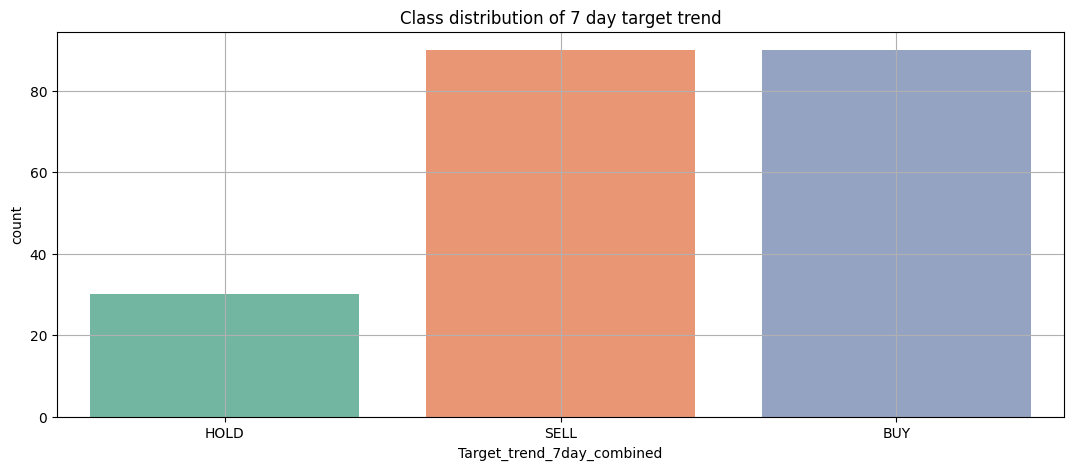

In [7]:
# Plot countplot to check if BUY, SELL, HOLD are balanced
plt.figure(figsize=(13,5))
plt.title('Class distribution of 7 day target trend')

sns.countplot(data=plot_df, x='Target_trend_7day_combined', hue='Target_trend_7day_combined', palette='Set2')


plt.grid(True)
plt.show()

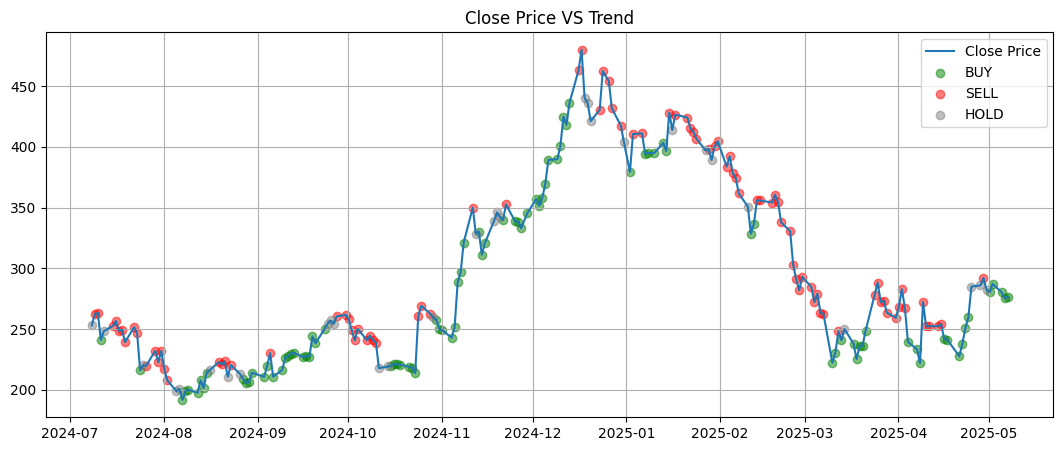

In [8]:
# Plot Close price with trend over time
plt.figure(figsize=(13,5))
plt.title('Close Price VS Trend')

colors = {'BUY': 'green', 'SELL': 'red', 'HOLD': 'grey'}

plt.plot(plot_df['Close'], label='Close Price')
for trend in ['BUY', 'SELL', 'HOLD']:
    trend_data = plot_df[plot_df['Target_trend_7day_combined'] == trend]
    plt.scatter(trend_data.index, trend_data['Close'], label=trend, color=colors[trend], alpha=0.5)

plt.legend()

plt.grid(True)
plt.show()

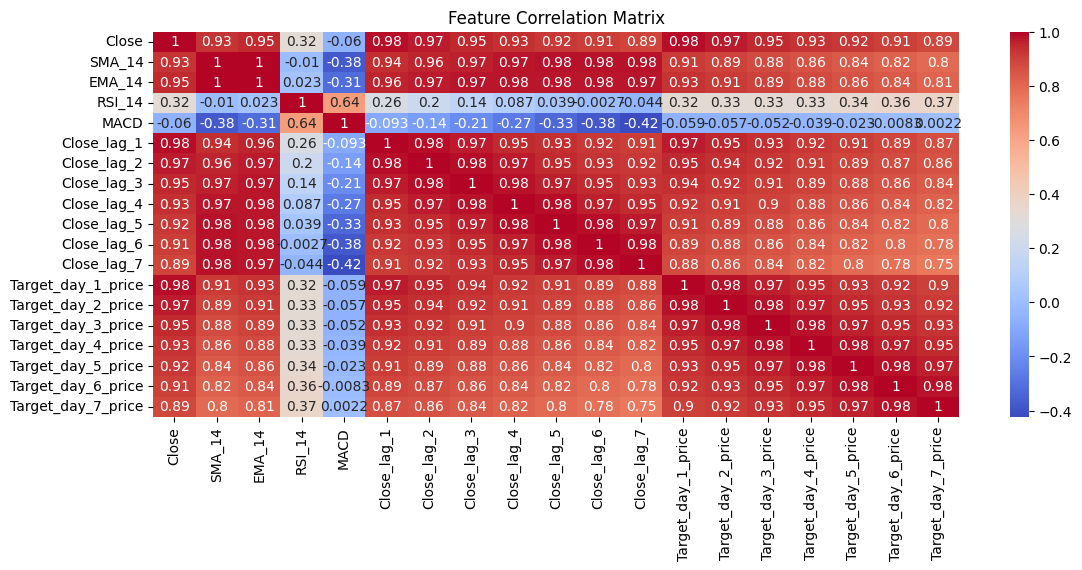

In [10]:
# Feature Correlation Heatmap
plt.figure(figsize=(13, 5))
plt.title("Feature Correlation Matrix")

sns.heatmap(plot_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.show()